In [23]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import researchpy as rp

column_names = ['ID', 'NUM_SERVERS', 'SERVER_CPU_COUNT', 'CONCURRENT_JOBS', 'L_HIGH', 'L_LOW', 'L_STEP', 'BATCH_SIZE', 'TOTAL_EXECUTOR_CORES', 'CORES_PER_EXECUTOR', 'MODEL', 'avg_queue_time', 'avg_queue_length', 'avg_response_time', 'expected_response_time', 'expected_num_of_jobs', 'failure_rate', 'arrival_rate', 'mean_service_time', 'sd_service_time', 'status']
df = pd.DataFrame(columns = column_names)

f = open(f'simulations/results-all.pkl', "rb")
result = pickle.load(f)
f.close()
for res in result:
    for r in res['res']:
        df = df.append({**res['settings'], **r}, ignore_index=True)
    
# for r in result['res']:
#     df = df.append({**res['settings'], **r}, ignore_index=True)

In [24]:
rp.summary_cont(df.groupby(['BATCH_SIZE', 'TOTAL_EXECUTOR_CORES', 'CORES_PER_EXECUTOR', 'MODEL']))['avg_response_time'][['N','Mean','SD']]

C:\Users\jeysb\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\jeysb\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


N      Mean  \
BATCH_SIZE TOTAL_EXECUTOR_CORES CORES_PER_EXECUTOR MODEL                   
64         1                    1                  lenet5  100  497.2380   
128        1                    1                  lenet5  100  287.6679   
           2                    1                  lenet5  100  572.7759   
           4                    1                  lenet5  100  362.9881   
256        1                    1                  lenet5  100  266.5820   

                                                                 SD  
BATCH_SIZE TOTAL_EXECUTOR_CORES CORES_PER_EXECUTOR MODEL             
64         1                    1                  lenet5   24.6003  
128        1                    1                  lenet5   42.1579  
           2                    1                  lenet5   63.9973  
           4                    1                  lenet5  154.1721  
256        1                    1                  lenet5    5.9424

C:\Users\jeysb\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


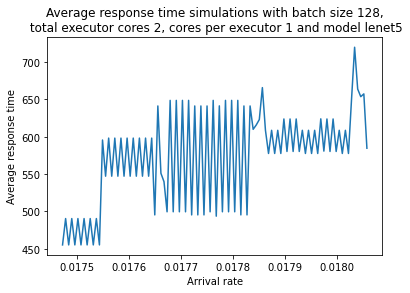

In [29]:
df_plt = df[df['BATCH_SIZE'] == 128][df['TOTAL_EXECUTOR_CORES'] == 2][df['CORES_PER_EXECUTOR'] == 1][df['MODEL'] == 'lenet5']

plt.title('Average response time simulations with batch size 128,\n total executor cores 2, cores per executor 1 and model lenet5')
plt.xlabel('Arrival rate')
plt.ylabel('Average response time')
plt.plot(df_plt['arrival_rate'], df_plt['avg_response_time'], label='AVG response time')

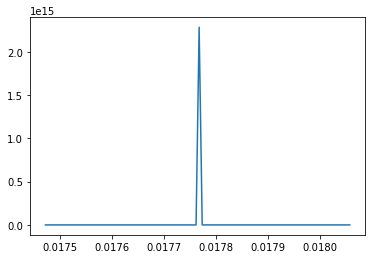

In [26]:
plt.plot(df_plt['arrival_rate'], df_plt['expected_response_time'].apply(lambda x: max(0, x)), label='AVG response time')

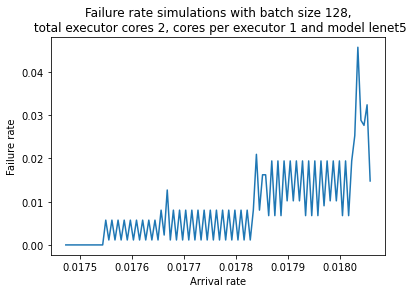

In [30]:
plt.title('Failure rate simulations with batch size 128,\n total executor cores 2, cores per executor 1 and model lenet5')
plt.xlabel('Arrival rate')
plt.ylabel('Failure rate')
plt.plot(df_plt['arrival_rate'], df_plt['failure_rate'], label='AVG response time')